<a href="https://colab.research.google.com/github/Priyo-prog/PySpark-training/blob/main/PySpark_Training_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Install Apache Spark in Google colab and setup the environment**

In [1]:
# Let's find the drive we want to download the Apache Spark
!pwd

/content


In [37]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

### **Download the Apache Spark**

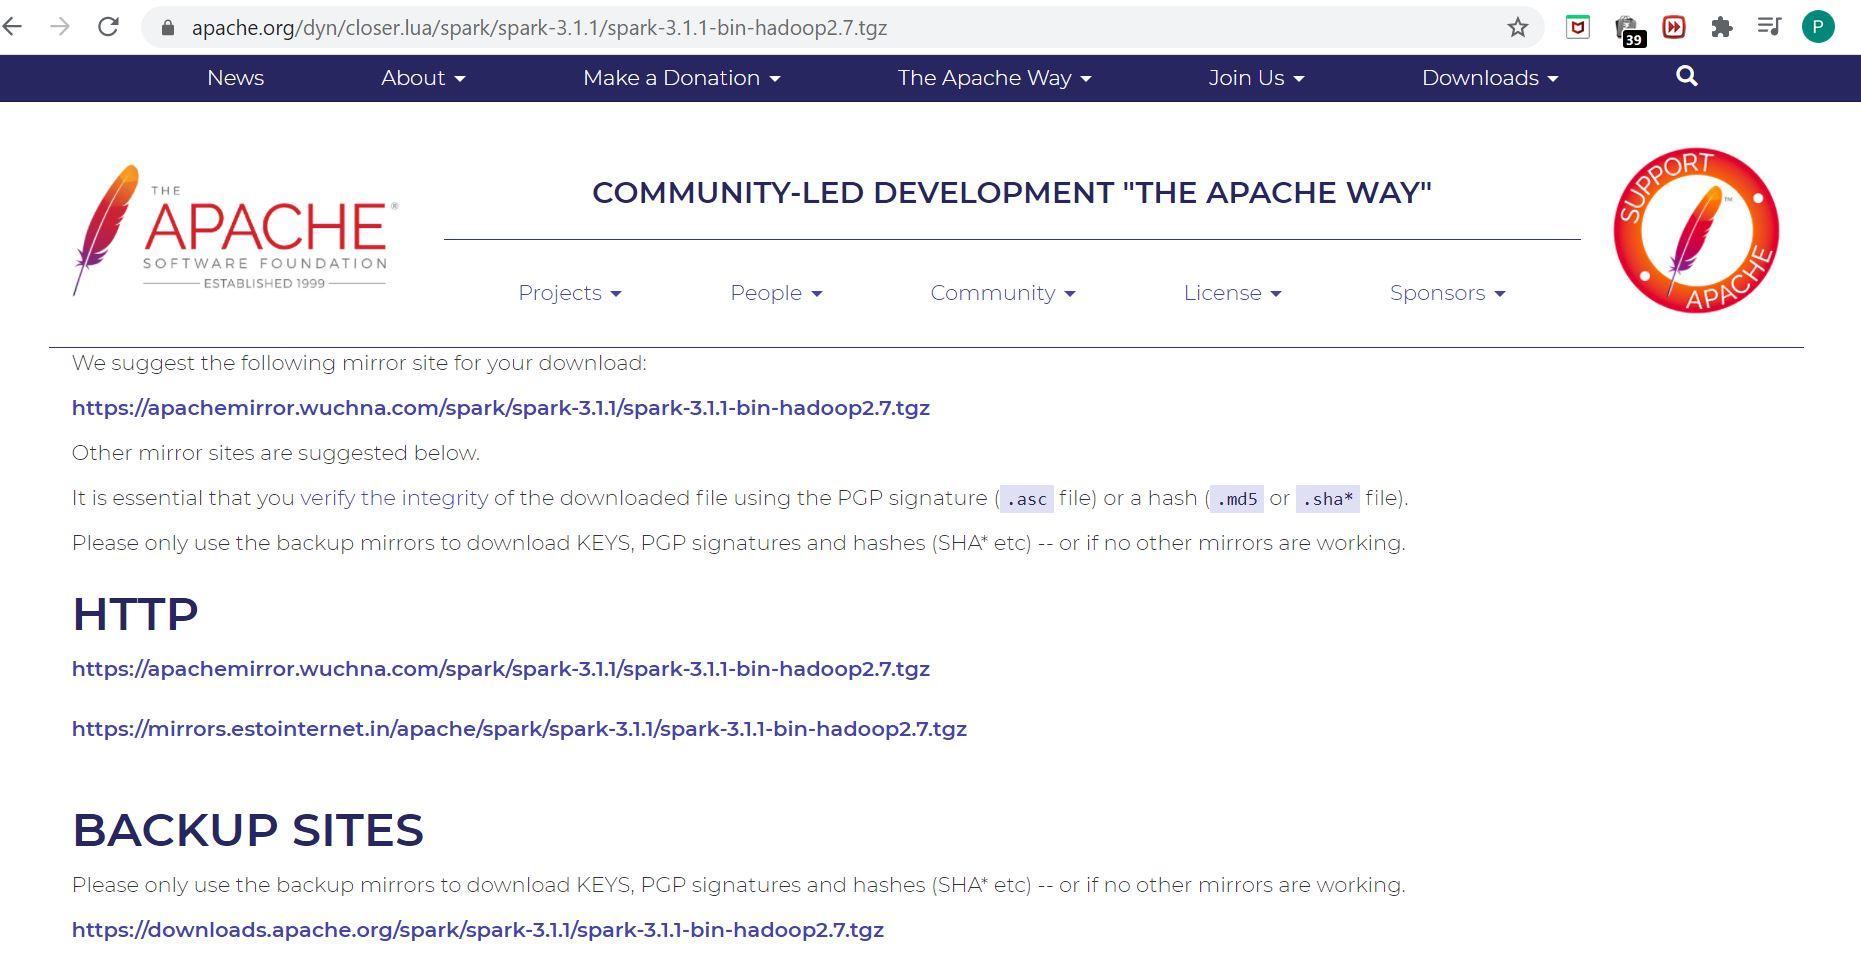

In [15]:
# use !wget command to download Apache Spark
!wget https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

--2021-08-20 10:12:19--  https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M   164MB/s    in 1.3s    

2021-08-20 10:12:38 (164 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]



In [16]:
# Extract the pyspark package 'spark-3.1.1-bin-hadoop2.7.tgz'
 
# spark-3.1.2-bin-hadoop3.2.tgz

!tar -xvzf spark-3.1.2-bin-hadoop3.2.tgz

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [18]:
# Check the extracted location of the Spark
!ls /content/spark-3.1.2-bin-hadoop3.2.tgz

/content/spark-3.1.2-bin-hadoop3.2.tgz


In [26]:
# Install findspark using pip install
!pip install findspark

In [38]:
import os

os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'

# Without initialization 'pyspark' library cannot be imported
import findspark
findspark.init()

## **PySpark intution**

In [31]:
# Apache Spark™ is a unified analytics engine for large-scale data processing. 
# This allows the processing of large scale data processing in distributed system


In [39]:
# import PySpark library 
# Create a session
import pyspark
from pyspark.sql import SparkSession

In [40]:
# Create a variable for session
spark = SparkSession.builder.appName('Dataframe').getOrCreate()
spark

In [41]:
# Mount Google Drive to import the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Read the dataset
df_hr_spark = spark.read.option('header', 'true').csv('/content/drive/MyDrive/Data Science/Human Resource Department/Human_Resources.csv', inferSchema=True)

In [43]:
df_hr_spark.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [44]:
# Print the schema same as pandas 'df.info()'
df_hr_spark.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [45]:
# Show head 5 data 
df_hr_spark.head(5)

[Row(Age=41, Attrition='Yes', BusinessTravel='Travel_Rarely', DailyRate=1102, Department='Sales', DistanceFromHome=1, Education=2, EducationField='Life Sciences', EmployeeCount=1, EmployeeNumber=1, EnvironmentSatisfaction=2, Gender='Female', HourlyRate=94, JobInvolvement=3, JobLevel=2, JobRole='Sales Executive', JobSatisfaction=4, MaritalStatus='Single', MonthlyIncome=5993, MonthlyRate=19479, NumCompaniesWorked=8, Over18='Y', OverTime='Yes', PercentSalaryHike=11, PerformanceRating=3, RelationshipSatisfaction=1, StandardHours=80, StockOptionLevel=0, TotalWorkingYears=8, TrainingTimesLastYear=0, WorkLifeBalance=1, YearsAtCompany=6, YearsInCurrentRole=4, YearsSinceLastPromotion=0, YearsWithCurrManager=5),
 Row(Age=49, Attrition='No', BusinessTravel='Travel_Frequently', DailyRate=279, Department='Research & Development', DistanceFromHome=8, Education=1, EducationField='Life Sciences', EmployeeCount=1, EmployeeNumber=2, EnvironmentSatisfaction=3, Gender='Male', HourlyRate=61, JobInvolvement

In [46]:
# Check out a particular column
df_hr_spark.select('EducationField').show(10)

+--------------+
|EducationField|
+--------------+
| Life Sciences|
| Life Sciences|
|         Other|
| Life Sciences|
|       Medical|
| Life Sciences|
|       Medical|
| Life Sciences|
| Life Sciences|
|       Medical|
+--------------+
only showing top 10 rows



In [47]:
# Check the type of the column
type(df_hr_spark.select('EducationField'))

pyspark.sql.dataframe.DataFrame

In [48]:
# Check two columns
df_hr_spark.select(['EducationField', 'Attrition']).show(10)

+--------------+---------+
|EducationField|Attrition|
+--------------+---------+
| Life Sciences|      Yes|
| Life Sciences|       No|
|         Other|      Yes|
| Life Sciences|       No|
|       Medical|       No|
| Life Sciences|       No|
|       Medical|       No|
| Life Sciences|       No|
| Life Sciences|       No|
|       Medical|       No|
+--------------+---------+
only showing top 10 rows



In [49]:
# To see the statistical information of the dataframe
df_hr_spark.describe().show()

+-------+------------------+---------+--------------+------------------+---------------+----------------+------------------+----------------+-------------+-----------------+-----------------------+------+------------------+------------------+------------------+--------------------+------------------+-------------+-----------------+------------------+------------------+------+--------+------------------+-------------------+------------------------+-------------+------------------+------------------+---------------------+------------------+------------------+------------------+-----------------------+--------------------+
|summary|               Age|Attrition|BusinessTravel|         DailyRate|     Department|DistanceFromHome|         Education|  EducationField|EmployeeCount|   EmployeeNumber|EnvironmentSatisfaction|Gender|        HourlyRate|    JobInvolvement|          JobLevel|             JobRole|   JobSatisfaction|MaritalStatus|    MonthlyIncome|       MonthlyRate|NumCompaniesWorked|O

In [51]:
from pyspark.sql.types import (StructField, StringType,
                               IntegerType, StructType)

In [54]:
# Grab a particular field
df_hr_spark.select('Age').show(5)

+---+
|Age|
+---+
| 41|
| 49|
| 37|
| 33|
| 27|
+---+
only showing top 5 rows



In [56]:
df_hr_spark.select(['Age', 'DailyRate']).show(5)

+---+---------+
|Age|DailyRate|
+---+---------+
| 41|     1102|
| 49|      279|
| 37|     1373|
| 33|     1392|
| 27|      591|
+---+---------+
only showing top 5 rows

